In [69]:
#Installs
!pip install icecream
!pip install seaborn            

#Imports

import matplotlib.pyplot as plt
import numpy as np
from icecream import ic
import seaborn as sns

In [77]:
#Configs

sns.set_style("darkgrid")

There are multiple methods to simulate population, let's try to go iteratively, represent the evolution, and look at it critically

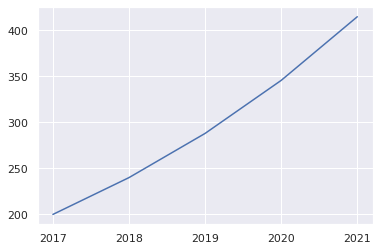

In [78]:
#Simplest way is to have a population x and have it grow at a growth rate r

def simple_population_growth(x,r):
    return round(r*x,2)

#Let's plot that over 5 years for example
years = ["2017","2018","2019","2020","2021"]
growth_rate = 1.2
base_population = 200

x_over_five_years = [base_population]
for i in range(1,5):
    x_over_five_years.append(simple_population_growth(x_over_five_years[i-1],growth_rate))

plt.plot(years,x_over_five_years)

But this is a shit method because the population will just grow exponentially and never stop.

So, what makes a population not do that in real life ? The answer is it's environment. 

We need to account for death as well.

So, how do we do that?

Well, we add a term, that shows that for whatever reasons, the growth is only applied to a fraction of the theoretical maximum population. In other words, we constrain it.

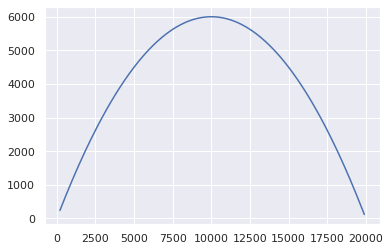

In [79]:
def constrained_population_growth(x,r,K):
    return r*x*(1-(x/K))

growth_rate = 1.2
K = 20000 #K is the carrying capacity. It is the maximum population of an organism that the environment can sustain indefinitely

#Now let's plot the comparison between population at year n and n+1.

population_at_year_n = np.arange(200,20000,100)
population_at_year_n_plus_1 = []
for value in population_at_year_n:
    population_at_year_n_plus_1.append(constrained_population_growth(value,growth_rate,K))

plt.plot(population_at_year_n,population_at_year_n_plus_1)


Why plotting this and not the evolution over the years like before?

Well, because this graph sheds light on the fact that using this equation (called a logistic map), the higher the population is at year n, the lower it will be at n+1, and inversely. 

It is a negative feedback loop. 

A better way of representing it, is to ditch K and represent the population as a percentage of it's carrying capacity.

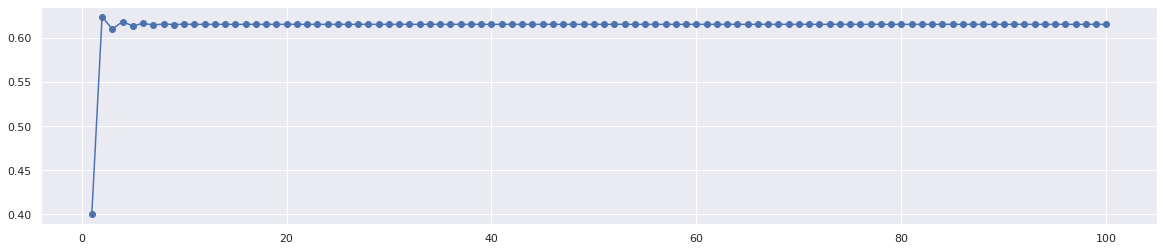

In [84]:
def constrained_population_growth_by_percentage(r,x):
    return r*x*(1-x)

growth_rate = 2.6
x = 0.4 #% of maximum population

population = [x]
for i in range(1,100):
    population.append(constrained_population_growth_by_percentage(growth_rate,population[i-1]))


f = plt.figure()
f.set_figwidth(20)

plt.scatter(np.arange(1,101),population)
plt.plot(np.arange(1,101),population)

Population stabilizes almost instantly, no matter the base population.

But what about the growth rate ? Let's plot some extreme growth rates and see what happens

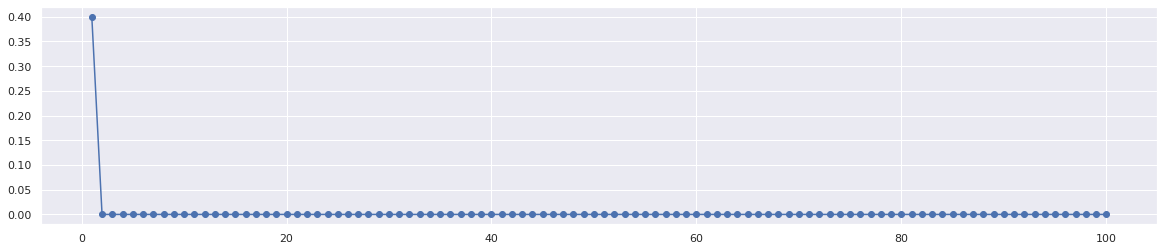

In [83]:
growth_rate = 0
x = 0.4 #% of maximum population

population = [x]
for i in range(1,100):
    population.append(constrained_population_growth_by_percentage(growth_rate,population[i-1]))


f = plt.figure()
f.set_figwidth(20)

plt.scatter(np.arange(1,101),population)
plt.plot(np.arange(1,101),population)

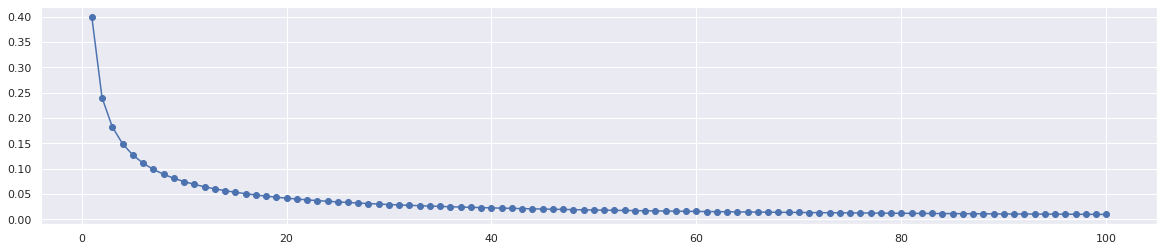

In [85]:
growth_rate = 1
x = 0.4 #% of maximum population

population = [x]
for i in range(1,100):
    population.append(constrained_population_growth_by_percentage(growth_rate,population[i-1]))


f = plt.figure()
f.set_figwidth(20)

plt.scatter(np.arange(1,101),population)
plt.plot(np.arange(1,101),population)

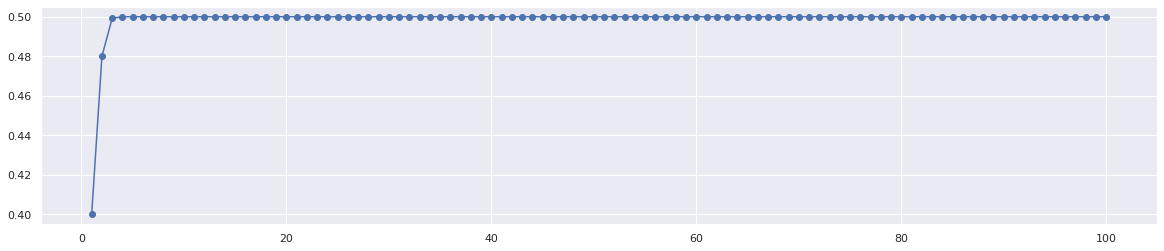

In [86]:
growth_rate = 2
x = 0.4 #% of maximum population

population = [x]
for i in range(1,100):
    population.append(constrained_population_growth_by_percentage(growth_rate,population[i-1]))


f = plt.figure()
f.set_figwidth(20)

plt.scatter(np.arange(1,101),population)
plt.plot(np.arange(1,101),population)

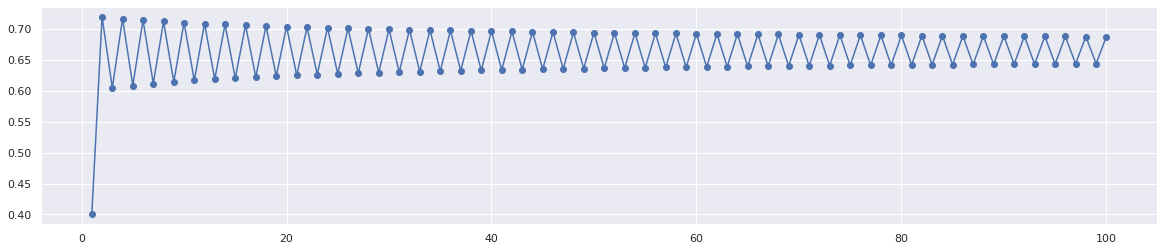

In [87]:
growth_rate = 3
x = 0.4 #% of maximum population

population = [x]
for i in range(1,100):
    population.append(constrained_population_growth_by_percentage(growth_rate,population[i-1]))


f = plt.figure()
f.set_figwidth(20)

plt.scatter(np.arange(1,101),population)
plt.plot(np.arange(1,101),population)

Wow. This is weird. Let's see some more points.

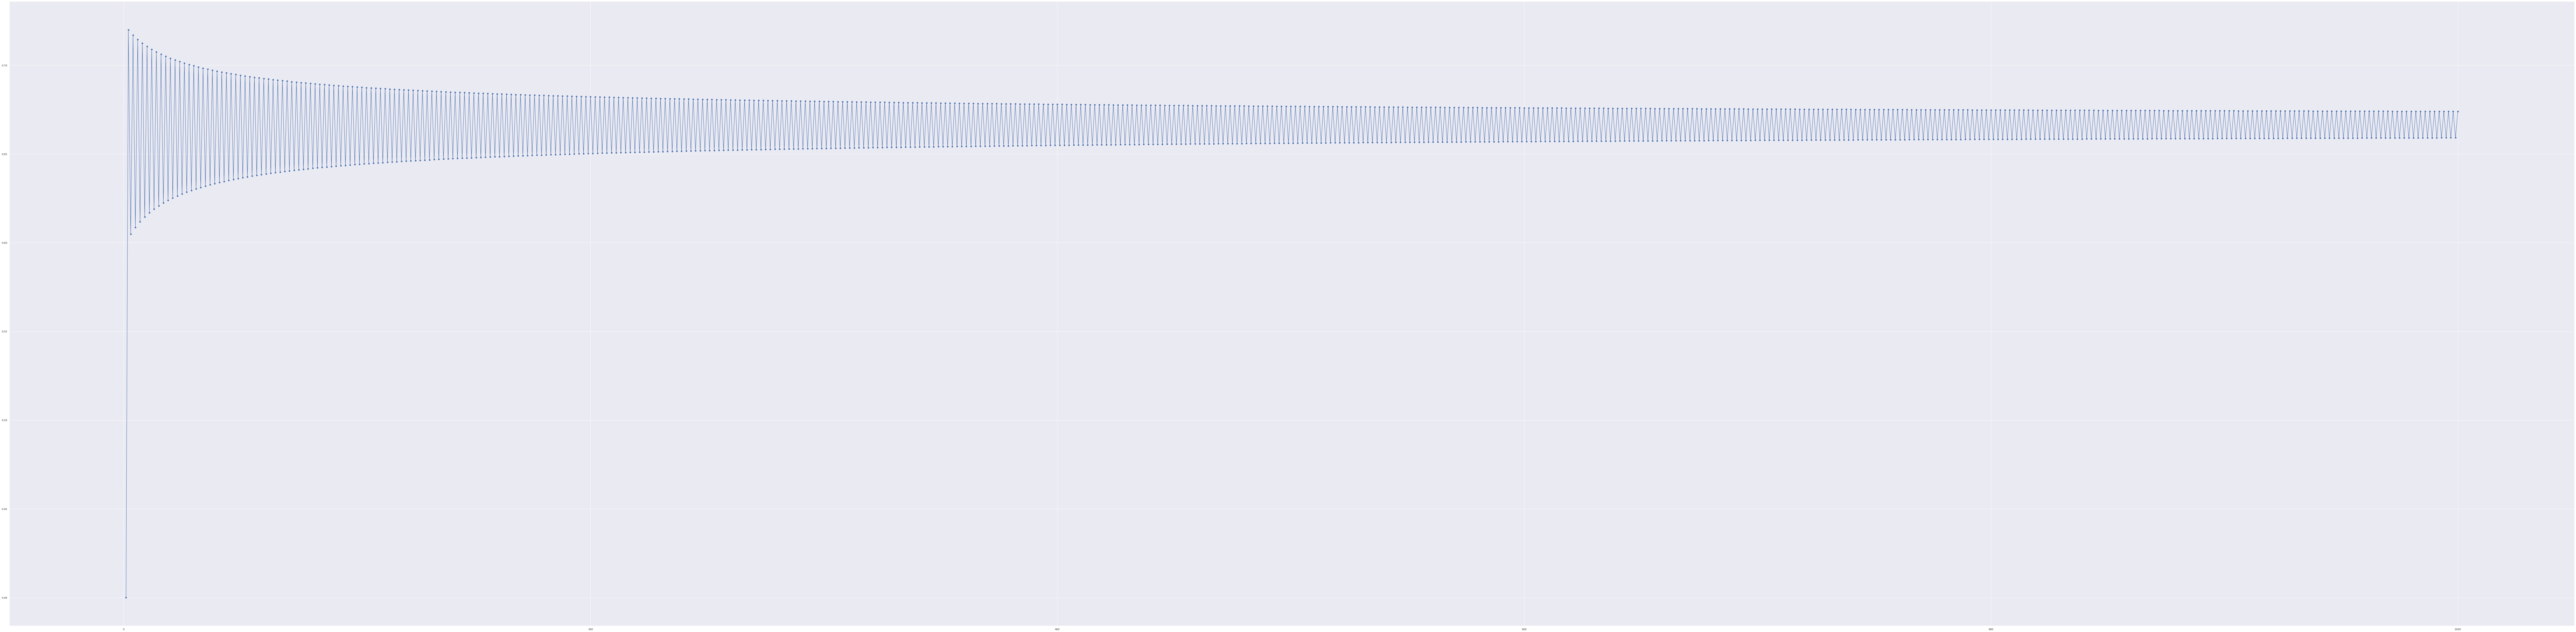

In [88]:
growth_rate = 3
x = 0.4 #% of maximum population

population = [x]
for i in range(1,1000):
    population.append(constrained_population_growth_by_percentage(growth_rate,population[i-1]))


f = plt.figure()
f.set_figwidth(200)
f.set_figheight(50)

plt.scatter(np.arange(1,1001),population)
plt.plot(np.arange(1,1001),population)

The fuck. The pattern seems to be endless. That's kinda weird.